In [2]:
from model import get_models_and_path
models = get_models_and_path()


In [7]:
resFreeze = models[-4]
print(resFreeze[0].__class__.__name__)
print(resFreeze[1])
res = models[-5]
print(res[0].__class__.__name__)
print(res[1])


In [14]:
target = "gene1.0.bias"

for name, param in resFreeze[0].named_parameters():
    if name != target:
        continue
    
    print(name, ": ", param.data)
    
for name, param in res[0].named_parameters():
    if name != target:
        continue
    #print(name)
    print(name, ": ", param.data)
    

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../Training_Data/p009/meta_data/gene_data.csv")
print(df.head())

In [4]:
print(df["MKI67"])

In [9]:
df = pd.read_csv("../Training_Data/p013/meta_data/gene_data.csv")
print(df.head())
mk = df["MKI67"]
rb = df["RUBCNL"]

#RUBCNL

In [10]:
print(rb.min())
print(mk.min())


In [11]:
rb.value_counts()

In [12]:
mk.value_counts()


In [18]:
class A():
    def __init__(self, mylist):
        for item in mylist:
            setattr(self, item, item + "xxx")
            print(getattr(self, item))
            print(item)
a = A(["a", "b"])

In [19]:
a.c = "asb"
print(getattr(a, "b"))
print(a.b)
print(a.c)

In [9]:
import json
json_path = "./test.json"
with open(json_path, "w") as f:
    json_dict = {"type":"vgg13", "random_weights":True, 'gene_list':["abc", "def"], "dropout": True, "pretrained_output_dim":1000}
    json.dump(json_dict, f)
    
with open(json_path) as f:
    d = json.load(f)
    print(d)
    model_type = d["type"]
    print(type(model_type), model_type)
    random_weights = d["random_weights"]
    print(type(random_weights), random_weights)
    
    gene_list = d["gene_list"]
    print(type(gene_list), gene_list)
    
    dropout = d["dropout"]
    print(type(dropout), dropout)
    
    pretrained_output_dim = d["pretrained_output_dim"]
    print(type(pretrained_output_dim), pretrained_output_dim)
    

In [2]:
import matplotlib.pyplot as plt
path = "../models/resnet18/MKI67_random_freeze/ep_29_results.csv"
from plot_and_print import plot_data_scatter
data_dir = "../models/resnet18/MKI67_random_freeze/"
plot_data_scatter(data_dir)

In [19]:
import pandas as pd
from model import load_model
gene = "RUBCNL"
merge = pd.read_csv("../models/resnet50/" + gene + "_random_freeze_dropout/ep_29_results.csv")
model = load_model("../models/resnet50/" + gene + "_random/", "../models/resnet50/" + gene + "_random/ep_29.pt")
print(merge.head())
print(model.gene_list)
plt.scatter(merge['out_' + gene], merge['labels_' + gene], )
plt.plot( [-2,3],[-2,3], color='red' )
plt.xlabel('output')
plt.ylabel('target')
plt.show()


In [15]:
for gene in model.gene_list:
    out_string = "out_" + gene
    labels_string = "labels_" + gene

    plt.scatter(merge[out_string], merge[labels_string])
    import torchmetrics
    import torch
    mse = torchmetrics.MeanSquaredError()
    result = mse(torch.tensor(merge[out_string].to_numpy()), torch.tensor(merge[labels_string].to_numpy()))

    plt.text(x=-2, y=3, s="MSE: " + str(round(result.item(), 2)))
    plt.plot([-2,3],[-2,3], color='red')
    plt.xlabel('output')
    plt.ylabel('target')
plt.show()
    #plt.savefig(row["model_dir"] + "/scatter.png")

In [2]:
mylist = []
mylist.append([])


In [2]:
import timm
import torch

In [7]:

model = timm.create_model('resnet50d', num_classes=10, pretrained=True)
x     = torch.randn(1, 3, 224, 224)
model(x).shape

In [65]:
import torch
import torch.nn as nn

# Define input (a batch of 1 grayscale image of size 4x4)
input_tensor = torch.randn(1, 1, 100, 100)

# Define ConvTranspose2d layer
# Input channels = 1, Output channels = 1, Kernel size = 3, Stride = 2, Padding = 1
conv_transpose = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=2, stride=3)

# Forward pass
#output_tensor = conv_transpose(input_tensor, output_size=(1, 1, 8, 8))
output_tensor = conv_transpose(input_tensor)

# Print input and output shapes
print("Input shape: ", input_tensor.shape)   # (1, 1, 4, 4)
print("Output shape: ", output_tensor.shape) # (1, 1, 8, 8)
#print(input_tensor)
#print(output_tensor)

In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UpsampleResNet(nn.Module):
    def __init__(self):
        super(UpsampleResNet, self).__init__()

        # Input is n, 512, 1, 1, we need to progressively upsample to n, 3, 224, 224

        # First upsample from 512x1x1 to 256x7x7
        self.upsample1 = nn.ConvTranspose2d(512, 256, kernel_size=7, stride=1, padding=0, bias=False)
        self.bn1 = nn.BatchNorm2d(256)

        # Upsample from 256x7x7 to 128x14x14
        self.upsample2 = nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(128)

        # Upsample from 128x14x14 to 64x28x28
        self.upsample3 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False)
        self.bn3 = nn.BatchNorm2d(64)

        # Upsample from 64x28x28 to 32x56x56
        self.upsample4 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1, bias=False)
        self.bn4 = nn.BatchNorm2d(32)

        # Upsample from 32x56x56 to 16x112x112
        self.upsample5 = nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1, bias=False)
        self.bn5 = nn.BatchNorm2d(16)

        # Upsample from 16x112x112 to 3x224x224 (final RGB image)
        self.upsample6 = nn.ConvTranspose2d(16, 3, kernel_size=4, stride=2, padding=1, bias=False)

    def forward(self, x):
        # Input x is n, 512, 1, 1

        # First block
        x = self.upsample1(x)
        x = self.bn1(x)
        x = F.relu(x)

        # Second block
        x = self.upsample2(x)
        x = self.bn2(x)
        x = F.relu(x)

        # Third block
        x = self.upsample3(x)
        x = self.bn3(x)
        x = F.relu(x)

        # Fourth block
        x = self.upsample4(x)
        x = self.bn4(x)
        x = F.relu(x)

        # Fifth block
        x = self.upsample5(x)
        x = self.bn5(x)
        x = F.relu(x)

        # Final block (no activation needed, output should have RGB values)
        x = self.upsample6(x)

        return x

# Example usage:
model = UpsampleResNet()
input_tensor = torch.randn(1, 512, 1, 1)  # Batch size of 1, with 512x1x1 input
output = model(input_tensor)
print(output.shape)  # Expected shape: (1, 3, 224, 224)


In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UpsampleBlock(nn.Module):
    def __init__(self, in_planes, out_planes, stride=1, upsample=False):
        super(UpsampleBlock, self).__init__()
        self.conv1 = nn.ConvTranspose2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, output_padding=(stride - 1), bias=False)
        self.bn1 = nn.BatchNorm2d(out_planes)
        self.conv2 = nn.ConvTranspose2d(out_planes, out_planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_planes)

        self.upsample = None
        if upsample or stride != 1 or in_planes != out_planes:
            # When upsampling, adjust the input dimensions to match the output dimensions.
            self.upsample = nn.Sequential(
                nn.ConvTranspose2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, output_padding=(stride - 1), bias=False),
                nn.BatchNorm2d(out_planes)
            )

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.upsample is not None:
            identity = self.upsample(identity)

        out += identity
        out = F.relu(out)

        return out

class ResNetUpsample(nn.Module):
    def __init__(self, block, layers, num_classes=3):
        super(ResNetUpsample, self).__init__()

        # Start with n, 512, 1, 1 input
        self.in_planes = 512

        # Build four layers similar to ResNet
        self.layer1 = self._make_layer(block, 256, layers[0], stride=2, upsample=True)  # Upsample to 7x7
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2, upsample=True)  # Upsample to 14x14
        self.layer3 = self._make_layer(block, 64, layers[2], stride=2, upsample=True)   # Upsample to 28x28
        self.layer4 = self._make_layer(block, 32, layers[3], stride=2, upsample=True)   # Upsample to 56x56

        # Final layer to upsample to 224x224 and reduce to 3 channels
        self.upsample_final = nn.ConvTranspose2d(32, 3, kernel_size=4, stride=4, padding=0, output_padding=0, bias=False)

    def _make_layer(self, block, planes, blocks, stride=1, upsample=False):
        layers = []
        layers.append(block(self.in_planes, planes, stride, upsample=upsample))
        self.in_planes = planes
        for _ in range(1, blocks):
            layers.append(block(planes, planes))
        return nn.Sequential(*layers)

    def forward(self, x):
        # Input: n, 512, 1, 1
        x = self.layer1(x)  # Upsample to n, 256, 7, 7
        x = self.layer2(x)  # Upsample to n, 128, 14, 14
        x = self.layer3(x)  # Upsample to n, 64, 28, 28
        x = self.layer4(x)  # Upsample to n, 32, 56, 56

        # Final upsample to n, 3, 224, 224
        x = self.upsample_final(x)

        return x

def resnet18_upsample(num_classes=3):
    return ResNetUpsample(UpsampleBlock, [2, 2, 2, 2], num_classes)

# Example usage:
model = resnet18_upsample(num_classes=3)
input_tensor = torch.randn(1, 512, 1, 1)  # Batch size of 1 with 512x1x1 input
output = model(input_tensor)
print(output.shape)  # Expected shape: (1, 3, 224, 224)


In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.conv2 = nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(in_channels)
    
    def forward(self, x):
        residual = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += residual
        return F.relu(out)

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        
        # Initial input is (n, 512, 1, 1)
        self.initial_conv = nn.Upsample(size=(7,7)) #nn.ConvTranspose2d(512, 512, kernel_size=4, stride=1, padding=0)  # (n, 512, 4, 4)
        
        # Residual Block 1 (512, 4, 4)
        self.res_block1 = ResidualBlock(512)
        self.up1 = nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1)  # (n, 256, 8, 8)
        
        # Residual Block 2 (256, 8, 8)
        self.res_block2 = ResidualBlock(256)
        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1)  # (n, 128, 16, 16)
        
        # Residual Block 3 (128, 16, 16)
        self.res_block3 = ResidualBlock(128)
        self.up3 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)   # (n, 64, 32, 32)
        
        # Residual Block 4 (64, 32, 32)
        self.res_block4 = ResidualBlock(64)
        self.up4 = nn.ConvTranspose2d(64, 64, kernel_size=4, stride=2, padding=1)    # (n, 32, 64, 64)
        
        # Residual Block 5 (32, 64, 64)
        self.res_block5 = ResidualBlock(64)
        self.up5 = nn.ConvTranspose2d(64, 64, kernel_size=4, stride=2, padding=1)    # (n, 16, 128, 128)
        
        # Final upsampling and output (n, 16, 128, 128) -> (n, 3, 224, 224)
        self.final_conv = nn.ConvTranspose2d(64, 3, kernel_size=3, stride=1, padding=1)  # (n, 3, 224, 224)
    
    def forward(self, x):
        
        print("input", x.shape)
        # Initial expansion
        x = F.relu(self.initial_conv(x))
        
        print("initial", x.shape)
        # Series of residual blocks with upsampling
        x = self.res_block1(x)
        x = F.relu(self.up1(x))
        
        print("res1", x.shape)
        x = self.res_block2(x)
        x = F.relu(self.up2(x))
        
        print("res2", x.shape)
        x = self.res_block3(x)
        x = F.relu(self.up3(x))
        
        print("res3", x.shape)
        x = self.res_block4(x)
        x = F.relu(self.up4(x))
        
        print("res4", x.shape)
        x = self.res_block5(x)
        x = F.relu(self.up5(x))
        
        print("res5", x.shape)
        # Final upsampling and output
        x = torch.sigmoid(self.final_conv(x))  # Apply sigmoid to normalize the output to [0, 1]
        print("final", x.shape)
        return x

# Example usage
decoder = Decoder()
input_tensor = torch.randn(1, 512, 1, 1)  # Batch size of 1, (n, 512, 1, 1)
output_tensor = decoder(input_tensor)
print(output_tensor.shape)  # Should be (1, 3, 224, 224)


In [ ]:
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 56, 56])
torch.Size([1, 64, 56, 56])
torch.Size([1, 128, 28, 28])
torch.Size([1, 256, 14, 14])
torch.Size([1, 512, 7, 7])
torch.Size([1, 512, 1, 1])

In [3]:
from data_loader import get_patient_loader
data_dir = "../Training_Data/"
l = get_patient_loader(data_dir, "p013")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


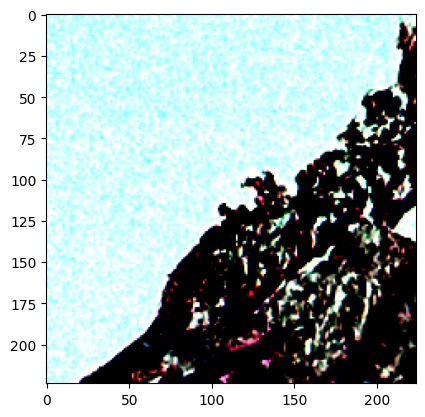

In [11]:
i = l[0][0]
import matplotlib.pyplot as plt
i = i.transpose(0,2)
i = i.transpose(0,1)
plt.imshow(i)
